In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("advertising.csv")  # replace with your file path

# Preview the dataset
print(df.head())


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [8]:
# For concise summary of the dataset
print(df.info())
print("\n")

# For descriptive statistics of the dataset
print(df.describe())
print("\n")

# Check missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


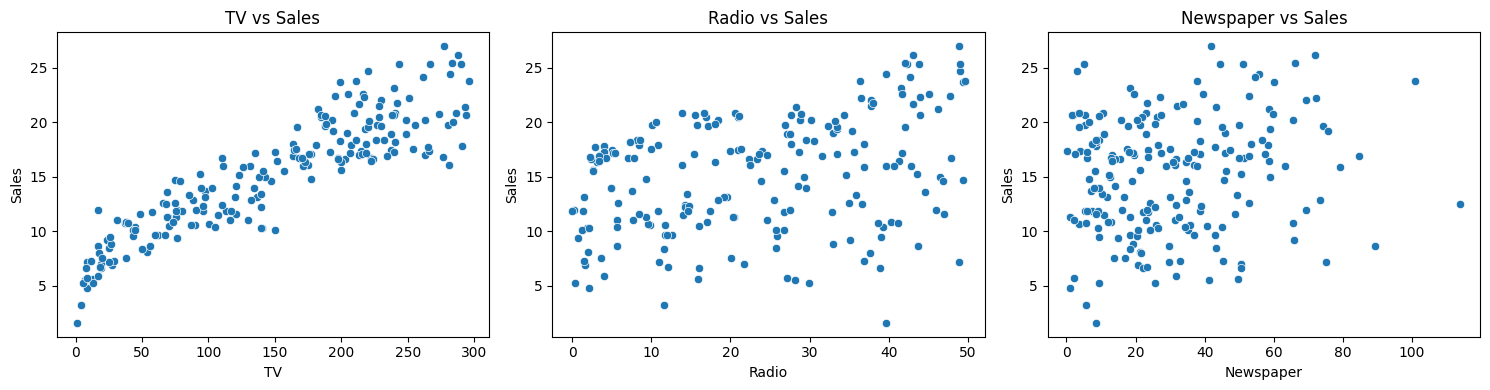

In [11]:
# Scatter plots
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title("TV vs Sales")

plt.subplot(1,3,2)
sns.scatterplot(x='Radio', y='Sales', data=df)
plt.title("Radio vs Sales")

plt.subplot(1,3,3)
sns.scatterplot(x='Newspaper', y='Sales', data=df)
plt.title("Newspaper vs Sales")

plt.tight_layout()
plt.show()

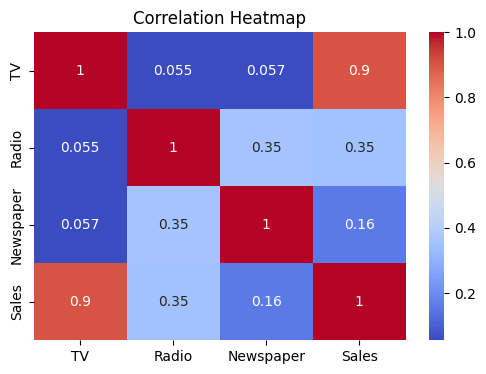

In [12]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


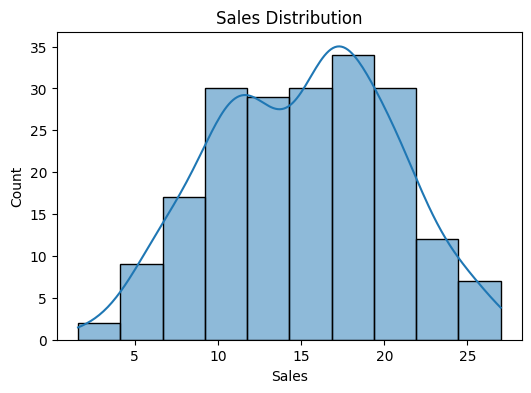

In [13]:
# Distribution of Sales
plt.figure(figsize=(6,4))
sns.histplot(df['Sales'], bins=10, kde=True)
plt.title("Sales Distribution")
plt.show()


Coefficients: [0.05450927 0.10094536 0.00433665]
Intercept: 4.714126402214127
R² Score: 0.9059011844150826
MSE: 2.9077569102710896


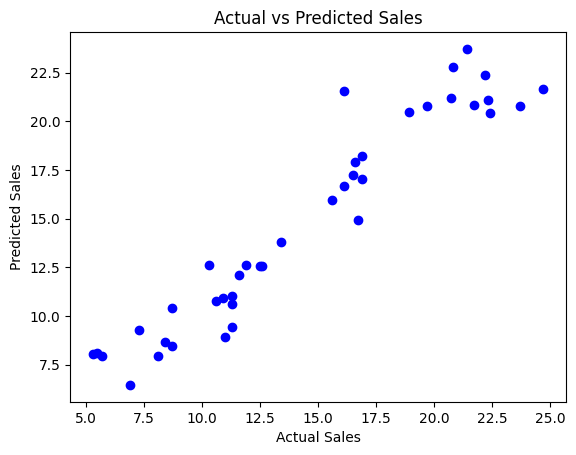

In [15]:
# Select Features (x) and Target (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Visualization: Actual vs Predicted
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()
